In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [31]:
def Payoff(spot,strike,cptype='c',num=1,premium=0):
    w=1 if cptype =='c' else -1
    return num*(np.maximum(w*(spot-strike),0)-premium)

def Black76(F,K,sd,df,w=1):
    d1=np.log(F/K)/sd+sd/2
    d2=d1-sd
    return w*F*norm.cdf(w*d1)-w*K*norm.cdf(w*d2)
def Black73(S0,K,T,sigma,r,q=0,w=1):
    if T<1e-10:
        return np.maximum(w*(S0-K),0)
    else:
        df=np.exp(-r*T)
        dq=np.exp(-q*T)
        sd=sigma*np.sqrt(T)
        F=S0*dq/df
        return df*Black76(F,K,sd,df,w)
def BlackGreeks(S0,K,T,sigma,r,q=0,w=1):
    df=np.exp(-r*T)
    dq=np.exp(-q*T)
    sd=sigma*np.sqrt(T)
    F=S0*dq/df
    d1=np.log(F/K)/sd+sd/2
    d2=d1-sd
    delta=w*dq*norm.cdf(w*d1)
    vega=S0*dq*np.sqrt(T)*norm.pdf(d1)
    gamma=dq*norm.pdf(d1)/S0/sd
    theta=-S0*sigma*dq*norm.pdf(d1)/np.sqrt(T)/2+w*q*S0*norm.cdf(w*d1)*dq-w*r*K*df*norm.cdf(w*d2)
    rho=w*K*T*df*norm.cdf(w*d2)
    return delta,gamma,theta,vega,rho



4.943866957230483 4.615608897348182


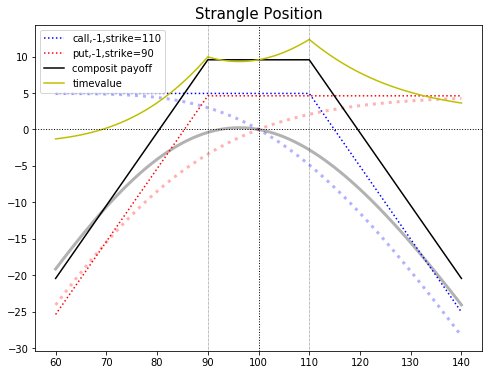

In [42]:
ds=1.0
spots=np.arange(60,140+ds,ds)
S0=100; K1=110; K2=90
r=0.02; q=0
sigma1=0.2; sigma2=0.25
T=1

p1=Black73(S0,K1,T,sigma1,r,q,w=1)
p2=Black73(S0,K2,T,sigma2,r,q,w=-1)
print(p1,p2)

call1=Black73(spots,K1,T,sigma1,r,q,w=1)
put2=Black73(spots,K2,T,sigma2,r,q,w=-1)

plt.figure(figsize=(8,6))
plt.plot(spots,p1-call1,ls=':',lw=3,alpha=0.3,c='b')
plt.plot(spots,p2-put2,ls=':',lw=3,alpha=0.3,c='r')
plt.plot(spots,p1+p2-call1-put2,lw=3,alpha=0.3,c='k')

payoff1=Payoff(spots,K1,'c')
payoff2=Payoff(spots,K2,'p')
timevalue=call1+put2-(payoff1+payoff2)
plt.plot(spots,-payoff1+p1,':',label=f'call,-1,strike={K1}',c='b')
plt.plot(spots,-payoff2+p2,':',label=f'put,-1,strike={K2}',c='r')
plt.plot(spots,-payoff1+p1-payoff2+p2,label=f'composit payoff',c='k')
plt.plot(spots,timevalue,label=f'timevalue',c='y')
plt.title('Strangle Position',fontsize=15)
plt.axhline(y=0,color='k',ls=':',lw=1)
plt.axvline(x=K1,color='k',ls=':',lw=0.5)
plt.axvline(x=K2,color='k',ls=':',lw=0.5)
plt.axvline(x=S0,color='k',ls=':',lw=1)
plt.legend()

Text(0.5, 1.0, 'Vega')

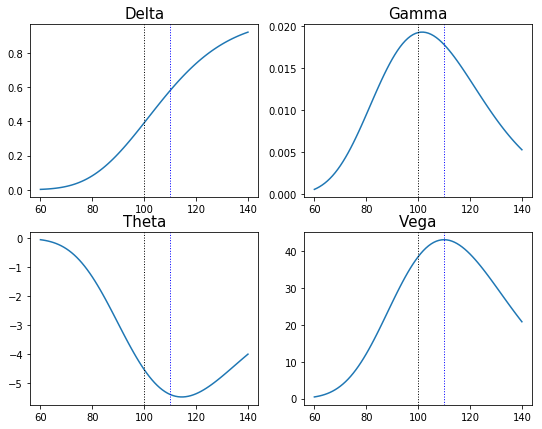

In [39]:
#GREEKS
greeks=BlackGreeks(spots,K1,T,sigma1,r,q,w=1)
np.array(greeks).shape
delta,gamma,theta,vega=greeks[0],greeks[1],greeks[2],greeks[3]
plt.figure(figsize=(9,7))
plt.subplot(2,2,1); plt.plot(spots,delta); plt.axvline(x=K1,color='b',ls=':',lw=1);
plt.axvline(x=S0,color='k',ls=':',lw=1);plt.title('Delta',fontsize=15)
plt.subplot(2,2,2); plt.plot(spots,gamma); plt.axvline(x=K1,color='b',ls=':',lw=1);
plt.axvline(x=S0,color='k',ls=':',lw=1);plt.title('Gamma',fontsize=15)
plt.subplot(2,2,3); plt.plot(spots,theta); plt.axvline(x=K1,color='b',ls=':',lw=1);
plt.axvline(x=S0,color='k',ls=':',lw=1);plt.title('Theta',fontsize=15)
plt.subplot(2,2,4); plt.plot(spots,vega); plt.axvline(x=K1,color='b',ls=':',lw=1);
plt.axvline(x=S0,color='k',ls=':',lw=1);plt.title('Vega',fontsize=15)

18.069062257446248 10.870558490557586 5.716386534322112


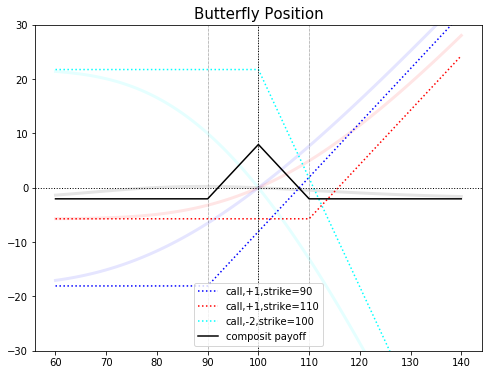

In [33]:
ds=1.0
spots=np.arange(60,140+ds,ds)
S0=100; K1=90; K2=100; K3=110
r=0.02; q=0
sigma1=0.3; sigma2=0.25; sigma3=0.22
T=1
c1=Black73(S0,K1,T,sigma1,r,q,w=1)
c2=Black73(S0,K2,T,sigma2,r,q,w=1)
c3=Black73(S0,K3,T,sigma3,r,q,w=1)

print(c1,c2,c3)

call1=Black73(spots,K1,T,sigma1,r,q,w=1)
call2=Black73(spots,K2,T,sigma2,r,q,w=1)
call3=Black73(spots,K3,T,sigma3,r,q,w=1)

plt.figure(figsize=(8,6))
plt.plot(spots,call1-c1,ls='-',lw=3,alpha=0.1,c='b')
plt.plot(spots,2*c2-2*call2,ls='-',lw=3,alpha=0.1,c='cyan')
plt.plot(spots,call3-c3,lw=3,alpha=0.1,c='r')
plt.plot(spots,call1+call3-2*call2-c1-c3+2*c2,lw=3,alpha=0.1,c='k')

payoff1=Payoff(spots,K1,'c')
payoff2=Payoff(spots,K2,'c')
payoff3=Payoff(spots,K3,'c')

plt.plot(spots,payoff1-c1,':',label=f'call,+1,strike={K1}',c='b')
plt.plot(spots,payoff3-c3,':',label=f'call,+1,strike={K3}',c='r')
plt.plot(spots,-2*payoff2+2*c2,':',label=f'call,-2,strike={K2}',c='cyan')

plt.plot(spots,payoff1+payoff3-2*payoff2-c1-c3+2*c2,label=f'composit payoff',c='k')
plt.title('Butterfly Position',fontsize=15)
plt.axhline(y=0,color='k',ls=':',lw=1)
plt.axvline(x=K1,color='k',ls=':',lw=0.5)
plt.axvline(x=K2,color='k',ls=':',lw=0.5)
plt.axvline(x=K3,color='k',ls=':',lw=0.5)
plt.axvline(x=S0,color='k',ls=':',lw=1)
plt.ylim(-30,30)
plt.legend()